<a href="https://colab.research.google.com/github/Abishethvarman/FakeNewsDetection/blob/bert/4.2-FakeNews_Detection_bert_base_cased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BERTbase on FakeNews Detection
https://youtu.be/LbYF0yMIFaM?si=6oWw52zsMUKU0LgJ
https://drive.google.com/drive/folders/11i95xjTWgr5q2uYwKVITfIXQ595M59-L

https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

In [ ]:
! pip install transformers
! pip install pycaret

In [2]:
##Import packages
import numpy as np
import pandas as pd
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,f1_score,confusion_matrix
import torch
import torch.nn as nn
# specify GPU
device = torch.device("cuda")

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [5]:
%cd /mydrive/dataset/

/content/gdrive/My Drive/dataset


In [6]:
df_reliable = pd.read_csv("Reliable.csv")
df_fake = pd.read_csv("Fake.csv")

In [7]:
df_reliable['Target'] = ['True']*len(df_reliable)
df_fake['Target'] = ['Fake']*len(df_fake)

In [8]:
df_reliable

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


In [9]:
print(df_reliable['subject'].unique())
print(df_fake['subject'].unique())

['politicsNews' 'worldnews']
['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [10]:
# df = pd.concat([df_reliable, df_fake]).reset_index(drop = True)
data = df_reliable.append(df_fake).sample(frac=1).reset_index().drop(columns=['index'])


In [11]:
data

,title,text,subject,date,Target
0,Elizabeth Warren Announces That A Major For P...,"If there s one thing Elizabeth Warren hates, i...",News,"August 25, 2016",Fake
1,Trump's pick for national security adviser tur...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"February 16, 2017",True
2,Trump orders probe of China's intellectual pro...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"August 14, 2017",True
3,Two women deny murdering North Korean leader's...,KUALA LUMPUR (Reuters) - Two women accused of ...,worldnews,"October 2, 2017",True
4,JUST IN: Listen To Trump Tell Howard Stern It...,It s been pretty obvious for a long time now t...,News,"October 8, 2016",Fake
...,...,...,...,...,...
44893,NRA’s Ted Nugent Unleashes Disgusting Attack ...,"NRA board member, draft-dodger, pedophile, and...",News,"September 19, 2016",Fake
44894,WATCH KARMA IN ACTION: CNN GETS HIT With Tear ...,The timing couldn t have been better. Just as ...,politics,"Aug 23, 2017",Fake
44895,Sen. McCain says will support changing rules t...,WASHINGTON (Reuters) - U.S. Sen. John McCain o...,politicsNews,"April 3, 2017",True
44896,"France sees talks on post-Iran nuclear deal, b...",PARIS (Reuters) - France suggested on Wednesda...,worldnews,"August 30, 2017",True


In [12]:
print(data.shape)
data.head()

(44898, 5)


,title,text,subject,date,Target
0,Elizabeth Warren Announces That A Major For P...,"If there s one thing Elizabeth Warren hates, i...",News,"August 25, 2016",Fake
1,Trump's pick for national security adviser tur...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"February 16, 2017",True
2,Trump orders probe of China's intellectual pro...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"August 14, 2017",True
3,Two women deny murdering North Korean leader's...,KUALA LUMPUR (Reuters) - Two women accused of ...,worldnews,"October 2, 2017",True
4,JUST IN: Listen To Trump Tell Howard Stern It...,It s been pretty obvious for a long time now t...,News,"October 8, 2016",Fake


In [13]:
data['label'] = pd.get_dummies(data.Target)['Fake']

In [14]:
data.head()

,title,text,subject,date,Target,label
0,Elizabeth Warren Announces That A Major For P...,"If there s one thing Elizabeth Warren hates, i...",News,"August 25, 2016",Fake,1
1,Trump's pick for national security adviser tur...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"February 16, 2017",True,0
2,Trump orders probe of China's intellectual pro...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"August 14, 2017",True,0
3,Two women deny murdering North Korean leader's...,KUALA LUMPUR (Reuters) - Two women accused of ...,worldnews,"October 2, 2017",True,0
4,JUST IN: Listen To Trump Tell Howard Stern It...,It s been pretty obvious for a long time now t...,News,"October 8, 2016",Fake,1


([<matplotlib.patches.Wedge at 0x7ac5a66a3ac0>,
 [Text(-1.1968727067385088, -0.0865778485782335, 'Fake'),
  Text(1.1968726986325005, 0.08657796063754254, 'True')],
 [Text(-0.6981757455974634, -0.05050374500396954, '52.3%'),
  Text(0.6981757408689586, 0.05050381037189981, '47.7%')])

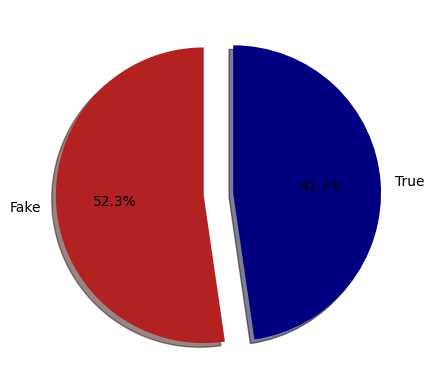

In [15]:
# Checking if our data is well balanced
label_size = [data['label'].sum(),len(data['label'])-data['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

In [16]:
# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(data['title'], data['label'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=data['Target'])
# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

In [29]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('bert-base-cased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-cased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Text(0, 0.5, 'Number of texts')

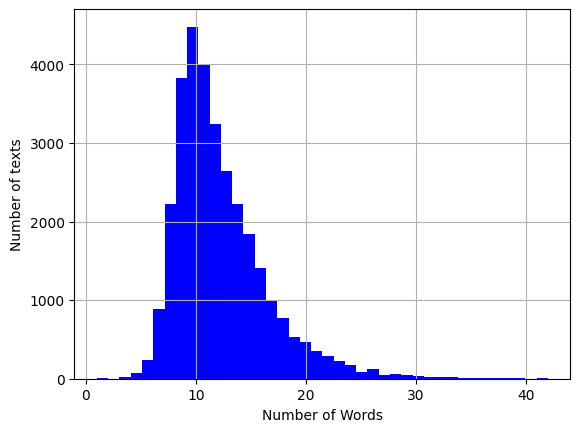

In [30]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in train_text]

pd.Series(seq_len).hist(bins = 40,color='blue')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [31]:
# BERT Tokeizer Functionality
sample_data = ["Build fake news model.",
               "Using bert."]                                         # sample data
tokenized_sample_data = tokenizer.batch_encode_plus(sample_data,
                                                    padding=True)     # encode text
print(tokenized_sample_data)

# Ref: https://huggingface.co/docs/transformers/preprocessing

{'input_ids': [[101, 139, 19118, 8406, 2371, 2235, 119, 102], [101, 7993, 1129, 3740, 119, 102, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0]]}


In [32]:
# Majority of titles above have word length under 15. So, we set max title length as 15
MAX_LENGHT = 15
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

In [33]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [34]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32                                               #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

In [35]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,2)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate
# Define the loss function
cross_entropy  = nn.NLLLoss()
# Number of training epochs
epochs = 2

In [36]:
# Defining training and evaluation functions
def train():
  model.train()
  total_loss, total_accuracy = 0, 0

  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():
  print("\nEvaluating...")
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(val_dataloader):    # Iterate over batches
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

In [37]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 2
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.
  Batch   650  of    983.
  Batch   700  of    983.
  Batch   750  of    983.
  Batch   800  of    983.
  Batch   850  of    983.
  Batch   900  of    983.
  Batch   950  of    983.

Evaluating...
  Batch    50  of    211.
  Batch   100  of    211.
  Batch   150  of    211.
  Batch   200  of    211.

Training Loss: 0.036
Validation Loss: 0.010

 Epoch 2 / 2
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.
  

In [ ]:
model.load_state_dict(torch.load(path))

In [38]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3212
           1       1.00      1.00      1.00      3523

    accuracy                           1.00      6735
   macro avg       1.00      1.00      1.00      6735
weighted avg       1.00      1.00      1.00      6735



In [39]:
# testing on unseen data
unseen_news_text = ["Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing",     # Fake
                    "WATCH: George W. Bush Calls Out Trump For Supporting White Supremacy",               # Fake
                    "U.S. lawmakers question businessman at 2016 Trump Tower meeting: sources",           # True
                    "Trump administration issues new rules on U.S. visa waivers"                          # True
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 15
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([1, 1, 0, 0])

In [40]:
with torch.no_grad():
    preds = []
    for seq, mask in zip(val_seq, val_mask):
        seq, mask = seq.unsqueeze(0), mask.unsqueeze(0)
        output = model(seq, mask)
        preds.append(output.argmax().item())

In [41]:
# Convert lists to numpy arrays
val_labels_np = val_labels.to_numpy()
preds_np = np.array(preds)

In [42]:
# Calculate metrics
accuracy = accuracy_score(val_labels_np, preds_np)
precision = precision_score(val_labels_np, preds_np)
recall = recall_score(val_labels_np, preds_np)
f1 = f1_score(val_labels_np, preds_np)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9984
Precision: 0.9991
Recall: 0.9977
F1 Score: 0.9984


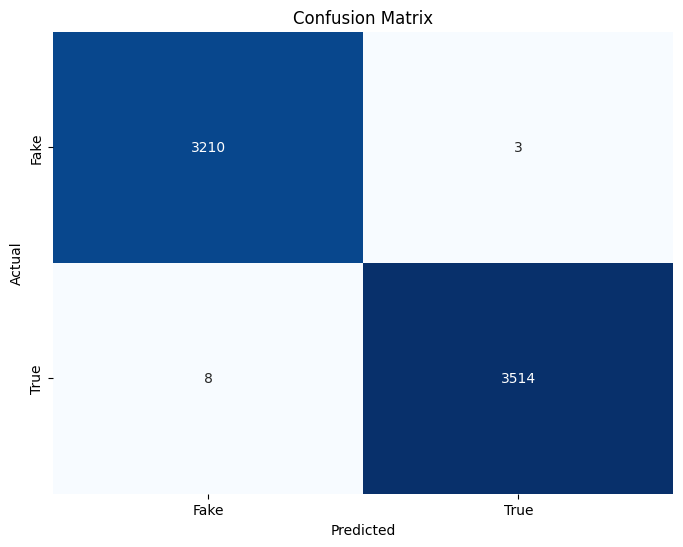

In [43]:
# Confusion matrix
cm = confusion_matrix(val_labels_np, preds_np)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

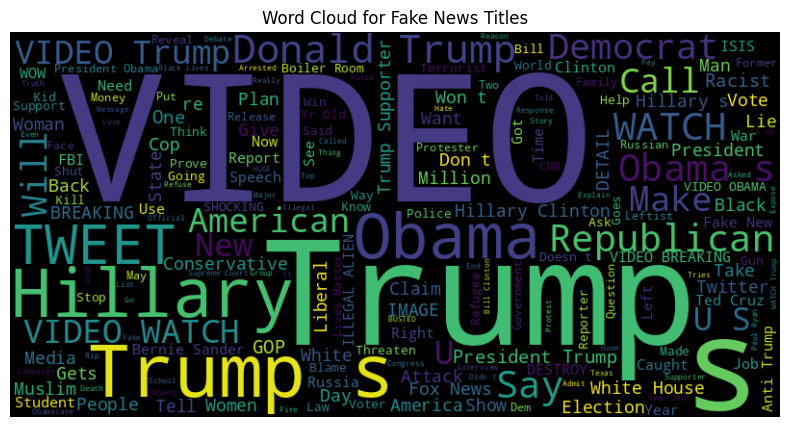

In [44]:
# Word Cloud for fake news
fake_text = ' '.join(data[data['label'] == 1]['title'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News Titles')
plt.show()

In [45]:
print(fake_text)









  Panama Papers Show Donald Trump’s Name Mentioned Over 3,500 Times “WHAT A WUSS!” CNN Political Hack Attacks Trump Adviser In On-Air Rant…She’s a Republican Strategist??? [Video] WATCH: JUAN HERNANDEZ Tells How He Was CHASED And BEATEN By Anti-Trump COWARDS Who Sucker Punch People And Run In Packs TWO RICH WHITE GUYS Who Made A Fortune Selling Ice Cream To Rich People Introduce NEW FLAVOR To Highlight BLACK VOTER SUPPRESSION WHAT? DEMOCRAT CONGRESSWOMAN Calls Violent Riots At Berkeley A “Beautiful Thing” [Video] MITT ROMNEY TELLS TRUMP How Republicans Win Elections  Jimmy Kimmel Imagines An Unlikely World In Which Jeb Bush Can Place Fourth In a Primary (VIDEO)  Donald Trump Complains To Europe That They Make It Too Hard For Him To Get Richer HUNGARIANS FIND SHOCKING VIDEOS On Phones Left Behind By Muslim Migrants  Trump Literally Turned This School’s Pep Rally To A ‘White Pride’ Rally (VIDEO) Iran ‘Will Respond’ if US Moves to Designate Revolutionary Guard as ‘Terrorist Group’